In [178]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180

In [179]:
import numpy as np

def y_value(a, b, x):
    """Get positive y value of the curve given x"""
    return pow(pow(x, 3) + x * a + b, 0.5)

class Point:
    def __init__(self, x=float('inf'), y=float('inf')):
        self.x = x
        self.y = y
    
    def __add__(self, other):
        assert type(other) is Point
        dx = other.x - self.x
        dy = other.y - self.y
        if dx == 0:
            return Point()
        slope = dy / dx
        x = (slope ** 2) - self.x - other.x
        y = slope * x + (self.y - slope * self.x)
        return Point(x, -y)
    
    def oppsite(self):
        return Point(self.x, -self.y)
    
    def np(self):
        return np.array([self.x, self.y])

In [180]:
import matplotlib.pyplot as plt

A = -3
B = 5

def plot_curve(p0, p1, p0_annotation, p1_annotation, third_point_annotation, sum_point_annotation):
    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    z = pow(y, 2) - pow(x, 3) - x * A - B

    plt.contour(x.ravel(), y.ravel(), z, [0])
    plt.axhline(y=0, color='r')
    plt.axvline(x=0, color='b')

    p2 = p0 + p1

    line0 = np.array([
        p0.np(),
        p2.oppsite().np(),
        p1.np()
    ])
    plt.plot(line0[:,0], line0[:,1], marker='o')
    plt.annotate(p0_annotation, xy=line0[0], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(p1_annotation, xy=line0[2], xytext=(-5, 5), textcoords='offset points')
    plt.annotate(third_point_annotation, xy=line0[1], xytext=(-5, 5), textcoords='offset points')

    line1 = np.array([
        p2.oppsite().np(),
        p2.np()
    ])
    plt.plot(line1[:,0], line1[:,1], marker='o')
    plt.annotate(sum_point_annotation, xy=line1[1], xytext=(0, 5), textcoords='offset points')

    plt.grid()
    plt.show()

In [181]:
a = Point(-2.1, y_value(A, B, -2.1))
b = Point(0.2, y_value(A, B, 0.2))
c = Point(-2.2, y_value(A, B, -2.2))

ab = a + b
bc = b + c

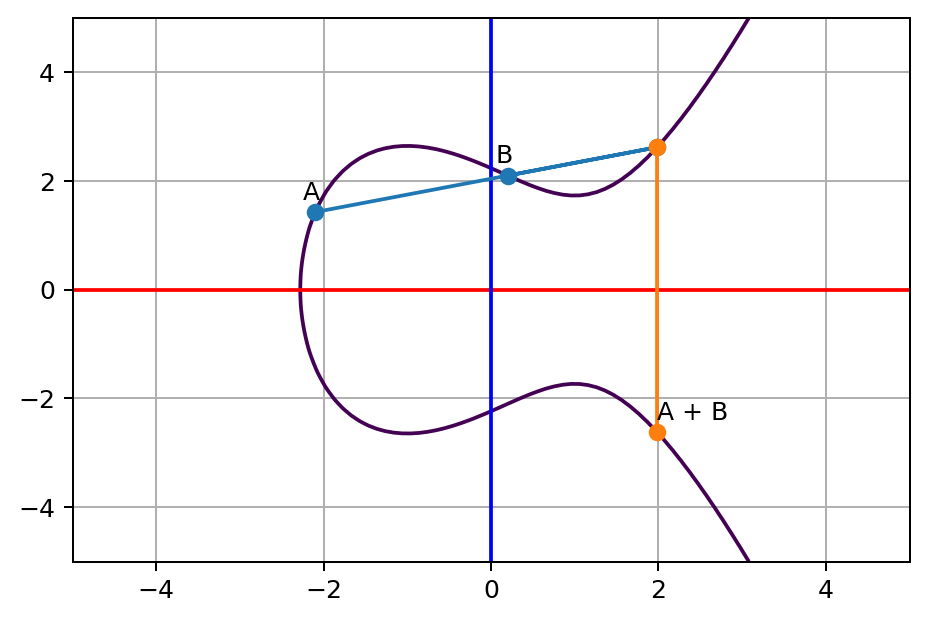

In [182]:
plot_curve(
    a, b,
    'A', 'B', '', 'A + B'
)

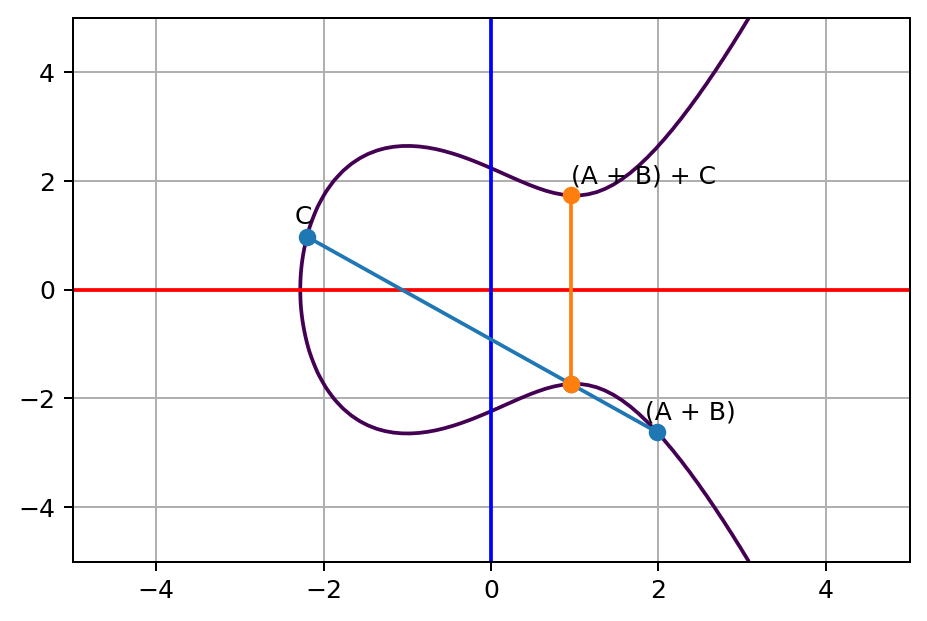

In [183]:
plot_curve(
    ab, c,
    '(A + B)', 'C', '', '(A + B) + C'
)

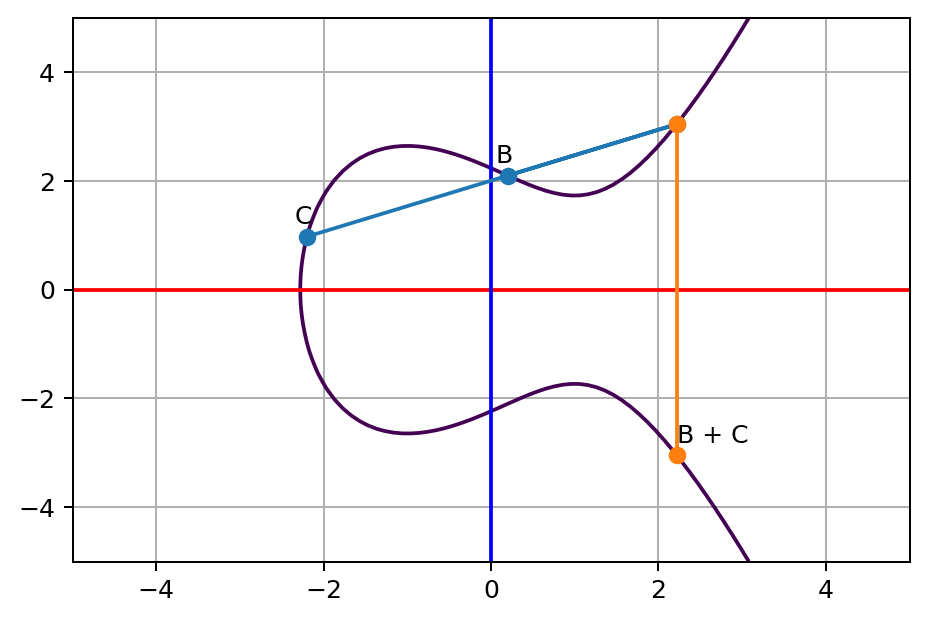

In [184]:
plot_curve(
    b, c,
    'B', 'C', '', 'B + C'
)

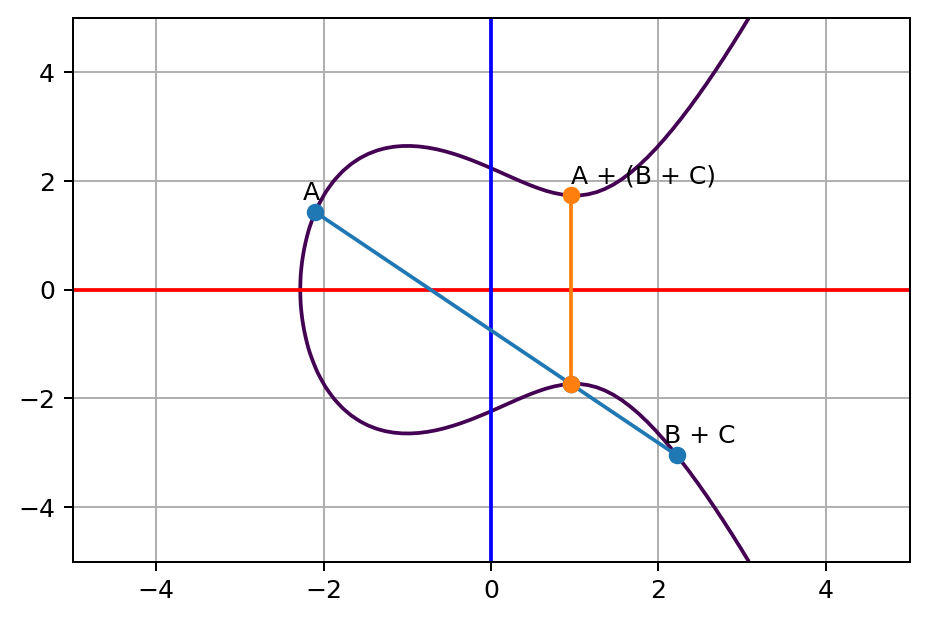

In [185]:
plot_curve(
    a, bc,
    'A', 'B + C', '', 'A + (B + C)'
)